# Prelab 4

In [20]:
# Imports and setup
from pint import UnitRegistry
import math
import numpy as np 
import matplotlib.pyplot as plt

# Use pint
units = UnitRegistry()
units.default_format = "~P"

# Define Tesla
ureg = UnitRegistry()
ureg.setup_matplotlib()
Q_ = ureg.Quantity

In [56]:
# Known values
L_goal = 20*10**(-6) * units.henry
B_max = 0.2 * units.tesla
D_max = 0.5 # Duty Cycle Max
I_pk = 6 * units.amp # Switched from 10 A from note from CAs
I_rms_cu = 10 * units.amp / (units.mm)**2 # rms
A_cmin = 59.1 * (units.mm)**2
A_w = 44 * (units.mm)**2
K_F = 0.05
A_coil = (11.1/2 * units.mm)**2 * math.pi

Lg_inches = np.array([
    0.002,
    0.003,
    0.004,
    0.005,
    0.006,
    0.007,
    0.008,
    0.009,
    0.01,
    0.011,
    0.012,
    0.013,
    0.014,
    0.015,
    0.016,
    0.017,
    0.018,
    0.019,
    0.020,
    0.021,
    0.022,
    0.023,
    0.024,
    0.025,
    0.026,
    0.027
]) # inches

Lg = Lg_inches*25.4*units.mm

wires = {
    0.82: 18,
    0.52: 20,
    0.33: 22,
    0.20: 24 
} # mm^2: awg

u_o = 1.2566 * 10**(-6) # free space (we only need this value)

In [57]:
# Current calculation and wire sizing
I_rms = math.sqrt(D_max/3) * I_pk
min_wire_area = I_rms/I_rms_cu
wire_gauge=0

for area in wires:
    if area > min_wire_area.magnitude:
        wire_gauge = wires[area]
        
print("Min wire gauge:", wire_gauge)

Min wire gauge: 22


In [60]:
# Calculate flux max and relevant values
phi_max = A_cmin * B_max
print("Phi_max:", phi_max)
min_turns = ((L_goal*I_pk)/phi_max).to_base_units()
print("Min turns:", math.ceil(min_turns))

F_max = I_rms_cu * A_w * K_F
print("F_max:", F_max.to_base_units())

Phi_max: 11.82 T·mm²
Min turns: 11
F_max: 22.0 A


In [66]:
# 2 * outer area + inner area
area_finder = lambda t: 2 * ((2*(7+t)*(10.65+t) - (7+t)*math.sqrt((9-t)**2 - (7+t)**2) - (9 - t)**2 * math.asin((7+t)/(9-t)))) + (np.pi*(8.8/2 + t)**2)
reluctance_finder = lambda t: u_o*10**(-3)*area_finder(t)/2/t
vfunc = np.vectorize(reluctance_finder)
R = vfunc(Lg)
N = np.sqrt(np.divide(L_goal,R))

# B = N*I_rms*u_o incorrect
F = N*I_rms
phi = np.divide(F, R)
B = phi / A_coil
W = 0.5 * np.multiply(np.power(phi, 2), R)


print(B)

[49167.00109305984 87709.13042379076 131169.9956320178 178124.6227130756 227592.90245246288 278853.44454748 331353.2210369264 384656.8312825809 438415.14423761173 492344.5493489265 546212.5113598116 599827.1120985155 653029.2406016835 705686.6131513454 757689.0991829498 808945.0043109133 859378.0706335319 908925.0246300275 957533.5495428853 1005160.5908680032 1051770.9256375562 1097335.9417474659 1141832.584630377 1185242.4363423644 1227550.8973606206 1268746.4444555321] A·H⁰⋅⁵/mm²


/home/lila/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2404: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  args = [asarray(arg) for arg in args]
/home/lila/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2453: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  inputs = [asanyarray(a, dtype=object) for a in args]


[3.0 4.0 4.0 5.0 5.0 6.0 6.0 6.0 7.0 7.0 7.0 7.0 8.0 8.0 8.0 8.0 8.0 8.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 10.0] H⁰⋅⁵
[1.5692659533022534e-05 1.8966766684182853e-05 1.4503300185936502e-05 1.8479656448541095e-05 1.5694135160336684e-05 1.9737327519606858e-05 1.759320213028675e-05 1.5927834106122888e-05 1.986897992625087e-05 1.839020257677061e-05 1.71602985879495e-05 1.6121862326117586e-05 1.989732733497376e-05 1.8894783094458517e-05 1.802004221083674e-05 1.7250585175016193e-05 1.6568899047781464e-05 1.5961160189393432e-05 1.951127014149921e-05 1.8889968757342722e-05 1.8327677491102033e-05 1.7816749426904865e-05 1.7350816629982564e-05 1.6924535048919008e-05 1.6533388448588202e-05 1.9967328544985336e-05] H


Text(0.5, 0, 'Lg')

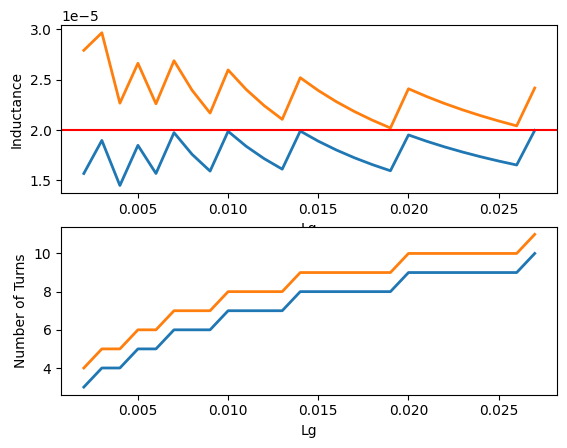

In [65]:
N_Floor = np.floor(N)
N_Ceiling = N_Floor.magnitude + 1

L_Possible = np.multiply(np.power(N_Floor,2),R)
L_Ceiling = np.multiply(np.power(N_Ceiling,2),R)

fig, ax = plt.subplots(2)

print(N_Floor)
print(L_Possible)

ax[0].plot(Lg_inches,L_Possible, linewidth=2.0)
ax[0].plot(Lg_inches,L_Ceiling, linewidth=2.0)
ax[0].axhline(y = 2.0e-05, color = 'r', linestyle = '-') 
ax[0].set_ylabel("Inductance")
ax[0].set_xlabel("Lg")

ax[1].plot(Lg_inches, N_Floor, linewidth=2.0)
ax[1].plot(Lg_inches, N_Ceiling, linewidth=2.0)
ax[1].set_ylabel("Number of Turns")
ax[1].set_xlabel("Lg")